***
# TP 7: Réseaux de neuronnes

+ Réalisé par:
    + Karim HOCINE.


***

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import tensorflow as tf 
from tensorflow.keras import Sequential, Model, Input 
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input
from tensorflow.keras.datasets.mnist import load_data
import time


# Utilitaires

In [2]:
def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def split_base(Base, labels, split_ratio ):
    Nb=Base.shape[0]
    Nbnew=round(Nb*split_ratio)
    l = [i for i in range(Nb)]
    l=random.sample(l, Nbnew)
    BaseApp=np.empty([Nbnew,Base.shape[1],Base.shape[2]])
    labelsApp=np.empty(Nbnew)


    for i in range (0,Nbnew):
        BaseApp[i,:,:]=Base[l[i],:,:]
        labelsApp[i]=labels[l[i]]

    return BaseApp,labelsApp

# I. Chargement et mise en forme des données

In [3]:
(X_train, y_train), (X_test, y_test) = load_data() 
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9) 
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9)

"""for i in range(200): 
  plt.subplot(10,20,i+1) 
  plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray') 
  plt.axis('off') 
  plt.show()"""

# Preprocess input data 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1) 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

# Normalisation
X_train /= 255 
X_test /= 255

# Preprocess class labels 
# Transforme nos label en vecteur de booléens
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
# Verification des dimensions
print("Dimension de X_train :", X_train.shape)
print("Dimension de Y_train :", Y_train.shape)
print("Dimension de X_test :", X_test.shape)
print("Dimension de Y_test :", Y_test.shape)

Dimension de X_train : (6000, 28, 28, 1)
Dimension de Y_train : (6000, 10)
Dimension de X_test : (1000, 28, 28, 1)
Dimension de Y_test : (1000, 10)


+ Il y'a 1000 images de dimension 28x28 dans la base de test.
+ Il y'a 10 classes.
+ Le prétraitement des données consiste à mettre en forme nos donnée pour qu'elles soient compatibles avec les entrées des modèles d'apprentissages choisis.
+ **tf.keras.utils.to_categorical: ** sert à  représenter nos 10 classes sous formes booléenne, ou on retrouvera un 1 à la position de la bonne classe et 0 dans les autres emplacement.
+ Dimension de Y_train : (6000, 10)

# II. Régression logistique

## 1. Définition du réseau de neuronne

In [5]:
# Initialiser le shape de nos entrées
inputs = Input(shape=(28,28,1)) 
# Fixer x comme etant notre entrée
x = inputs 
# Transformer X en vecteur
x=Flatten()(x) 
# une couche de 10 neuronnes comme sortie
outputs=Dense(10, activation='softmax')(x) 
# Créer le modèle a partie de l'architecture precedente
model = Model(inputs, outputs) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


+ On utilise la fonction d'activation softmax pour transformer nos sortie en probabilité d'appartenance à une Classe.
+ **Nombre de paramètres d'apprentissage:**
$$
params = (28*28)*10 + 10 = 7850
$$

+ **Flatten:** sert à transformer une matrice en un vecteur à une dimension.

## 2. Apprentissage

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


24/24 [==============================] - 1s 25ms/step - loss: 1.8766 - accuracy: 0.4416 - val_loss: 1.0671 - val_accuracy: 0.8010
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 0.9944 - accuracy: 0.8082 - val_loss: 0.7700 - val_accuracy: 0.8410
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 0.7688 - accuracy: 0.8411 - val_loss: 0.6503 - val_accuracy: 0.8480
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.6453 - accuracy: 0.8612 - val_loss: 0.5809 - val_accuracy: 0.8630
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.8663 - val_loss: 0.5318 - val_accuracy: 0.8670
Epoch 6/20
24/24 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.8666 - val_loss: 0.5066 - val_accuracy: 0.8700
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.5024 - accuracy: 0.8789 - val_loss: 0.4818 - val_accuracy: 0.8680
Epoch 8/20
24/24 [============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


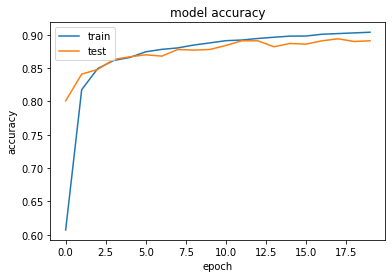

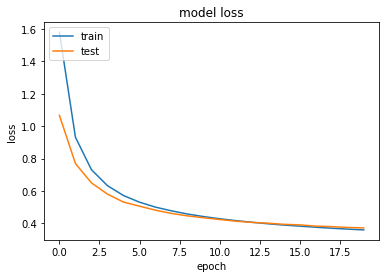

lr= 0.1 batch_size= 256 epochs= 20
accuracy = 0.890999972820282
Temps d apprentissage 3.5098569999999993


In [6]:
lr= 0.1
batch_size=256 
epochs=20

sgd1= tf.keras.optimizers.SGD(learning_rate=lr) 
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock()  
affiche(history) 

#donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print(f"accuracy = {history.history['val_accuracy'][-1]}")
print('Temps d apprentissage',tps2 - tps1)

+ lr : Learning Rate
+ Batchs : Sous ensemble de la base d'apprentissage.
+ Epochs : Nombres de fois que tous les exemples sont vus en apprentissages.
+ La crossentropie catégorielle est bien adaptée aux tâches de classification, puisqu'un exemple peut être considéré comme appartenant à une catégorie spécifique avec une probabilité 1, et à d'autres catégories avec une probabilité 0.

## 3. Evaluation du modèle

In [7]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 0.37240171432495117
Test accuracy: 89.0999972820282
Confusion Matrix
[[ 84   0   0   0   0   0   2   0   0   0]
 [  0 120   0   1   0   0   0   0   0   0]
 [  1   1  83   4   1   0   1   1   3   1]
 [  0   0   1  97   0   2   1   2   3   0]
 [  0   1   2   0  76   0   1   0   1   5]
 [  2   1   0   8   2  81   3   1   3   0]
 [  2   1   0   0   1   1 104   0   1   0]
 [  1   4   5   0   0   0   0  85   0   6]
 [  0   2   1   5   3   2   2   2  63   0]
 [  0   0   0   1   5   4   1   2   2  98]]


# III. MLP

## Création du modèle

In [38]:
inputs = Input(shape=(28,28,1)) 
x = inputs 
x=Flatten()(x) 
# 1ere couche avec 256 Neuronnes
x = Dense(256, activation='relu')(x) 
# Dropout de 50%
x = Dropout(0.5)(x)
# Couche de sortie avec 10 Neuronnes
outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


$$
params = (28*28*256 + 256) * (256*10 + 10)  = 203 530
$$

## 2. Apprentissage

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Epoch 1/20
24/24 [==============================] - 1s 17ms/step - loss: 1.6539 - accuracy: 0.4458 - val_loss: 0.4205 - val_accuracy: 0.8610
Epoch 2/20
24/24 [==============================] - 0s 10ms/step - loss: 0.4910 - accuracy: 0.8467 - val_loss: 0.3176 - val_accuracy: 0.9030
Epoch 3/20
24/24 [==============================] - 0s 10ms/step - loss: 0.3540 - accuracy: 0.8917 - val_loss: 0.2750 - val_accuracy: 0.9250
Epoch 4/20
24/24 [==============================] - 0s 10ms/step - loss: 0.2736 - accuracy: 0.9203 - val_loss: 0.2381 - val_accuracy: 0.9260
Epoch 5/20
24/24 [==============================] - 0s 10ms/step - loss: 0.2347 - accuracy: 0.9306 - val_loss: 0.2274 - val_accuracy: 0.9260
Epoch 6/20
24/24 [==============================] - 0s 10ms/step - loss: 0.2218 - accuracy: 0.9304 - val_loss: 0.2116 - val_accuracy: 0.9330
Epoch 7/20
24/24 [==============================] - 0s 10ms/step - loss: 0.1976 - accuracy: 0.9402 - val_loss: 0.2000 - val_accuracy: 0.9420
Epoch 8/20
24

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


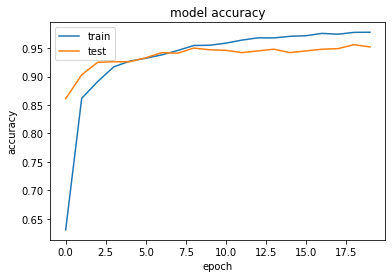

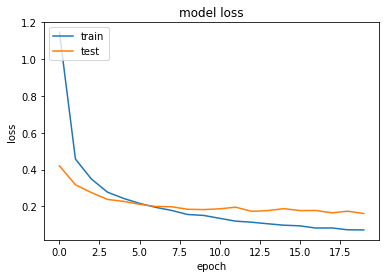

lr= 0.1 batch_size= 256 epochs= 20
accuracy = 0.9520000219345093
Temps d apprentissage 7.476841000000007


In [39]:
lr= 0.1
batch_size=256
epochs=20

sgd1= tf.keras.optimizers.SGD(learning_rate=lr, momentum = 0.9) 
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock()  
affiche(history) 

#donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print(f"accuracy = {history.history['val_accuracy'][-1]}")
print('Temps d apprentissage',tps2 - tps1)

+ Si le lr est trop grand ou trop petit le score diminue
+ Plus le batch_size est grand plus le loss test diminue

## 3. Evaluation du modèle

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 0.1660921424627304
Test accuracy: 94.59999799728394
Confusion Matrix
[[ 84   0   0   0   0   0   2   0   0   0]
 [  0 121   0   0   0   0   0   0   0   0]
 [  2   0  89   3   1   0   0   0   1   0]
 [  0   0   1 101   0   2   0   1   0   1]
 [  0   0   0   0  80   0   1   0   1   4]
 [  1   0   0   1   1  96   2   0   0   0]
 [  1   1   1   0   0   1 106   0   0   0]
 [  1   1   4   0   0   0   0  91   0   4]
 [  0   0   1   0   1   3   0   0  74   1]
 [  1   1   0   2   2   2   1   0   0 104]]


# IV. CNN

## 1. Architecture du modèle

In [11]:
inputs = Input(shape=(28,28,1)) 
x = inputs 
x = Convolution2D(32, kernel_size = (3, 3), activation='relu' )(x)
x = MaxPooling2D((3, 3))(x)
x = Convolution2D(64, kernel_size = (3, 3), activation='relu' )(x)
x = MaxPooling2D((3, 3))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) 
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x) 

outputs= Dense(10, activation='softmax')(x) 
model = Model(inputs, outputs) 
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6579

## 2. Apprentissage

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


24/24 [==============================] - 3s 109ms/step - loss: 2.2775 - accuracy: 0.1486 - val_loss: 1.4907 - val_accuracy: 0.6740
Epoch 2/20
24/24 [==============================] - 2s 102ms/step - loss: 1.2764 - accuracy: 0.5708 - val_loss: 0.3154 - val_accuracy: 0.9120
Epoch 3/20
24/24 [==============================] - 2s 100ms/step - loss: 0.4911 - accuracy: 0.8417 - val_loss: 0.1796 - val_accuracy: 0.9410
Epoch 4/20
24/24 [==============================] - 2s 97ms/step - loss: 0.2739 - accuracy: 0.9127 - val_loss: 0.1523 - val_accuracy: 0.9490
Epoch 5/20
24/24 [==============================] - 2s 98ms/step - loss: 0.2268 - accuracy: 0.9345 - val_loss: 0.1113 - val_accuracy: 0.9680
Epoch 6/20
24/24 [==============================] - 2s 97ms/step - loss: 0.1543 - accuracy: 0.9546 - val_loss: 0.1196 - val_accuracy: 0.9600
Epoch 7/20
24/24 [==============================] - 2s 98ms/step - loss: 0.1404 - accuracy: 0.9567 - val_loss: 0.1104 - val_accuracy: 0.9600
Epoch 8/20
24/24 [===

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


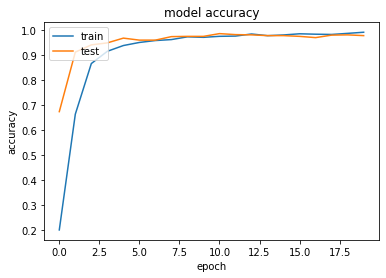

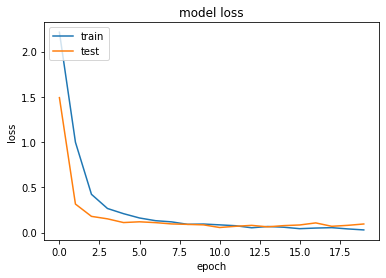

lr= 0.1 batch_size= 256 epochs= 20
accuracy = 0.9779999852180481
Temps d apprentissage 85.133025


In [12]:
lr= 0.1
batch_size=256 
epochs = 20

sgd1= tf.keras.optimizers.SGD(learning_rate=lr, momentum = 0.9) 
model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, Y_test)) 
tps2 = time.clock()  
affiche(history) 

#donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print(f"accuracy = {history.history['val_accuracy'][-1]}")
print('Temps d apprentissage',tps2 - tps1)

## 3. Evaluation du modèle

In [13]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=-1) 
print('Confusion Matrix') 
print(confusion_matrix(y_test, y_pred))

Test loss: 0.09550026804208755
Test accuracy: 97.79999852180481
Confusion Matrix
[[ 86   0   0   0   0   0   0   0   0   0]
 [  0 120   0   0   0   0   0   1   0   0]
 [  0   0  95   1   0   0   0   0   0   0]
 [  0   0   0 105   0   0   0   1   0   0]
 [  0   0   1   0  84   0   0   0   0   1]
 [  0   0   0   1   0  98   2   0   0   0]
 [  1   1   0   0   0   0 108   0   0   0]
 [  0   0   4   0   0   0   0  97   0   0]
 [  0   0   0   0   1   1   0   0  78   0]
 [  2   0   0   1   2   0   0   1   0 107]]
